In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob

files = glob('Z:\Descargas\CSV_DATA\*.csv')
col_names = {'Flow rate', 'Zone9_Pressure', 'Zone16_Pressure', 'Zone17_Pressure', 'Zone24_Pressure', 'TOTAL_QUALITY'}
target_name = 'TOTAL_QUALITY'

def split_ts(df, chunk_size):
    chunks = []
    for _, chunk in df.groupby(np.arange(len(df)) // chunk_size):
        chunks.append(chunk)
        
    first = chunks[0]
    last = chunks[-1]
    # si el último elemento del split no tiene el mismo 
    # shape que los demás, se descarta
    if first.shape != last.shape:
        chunks = chunks[:-1]
    return chunks 

def transform_chunk(df_chunk, target):
    chunk = df_chunk.values.tolist() 
    chunk = np.concatenate(chunk)
    chunk = pd.Series(chunk)
    chunk = pd.DataFrame().append(chunk, ignore_index=True)
    chunk[target_name] = target[0]
    return chunk

for file in files:
    df = pd.read_csv(file)[col_names]
    target = df[target_name]
    df = df.drop(target_name, axis=1)
    df_list = split_ts(df, 100)
    
    for df_chunk in df_list:
        transformed = transform_chunk(df_chunk, target)
        # append chunk into csv
        output_file = 'Z:\\Descargas\\chunks_time_series.csv'
        if not os.path.isfile(output_file):
            transformed.to_csv(output_file)
        else:
            transformed.to_csv(output_file, mode='a', header=False)    

In [5]:
import numpy as np
import pandas as pd

target_name = 'TOTAL_QUALITY'

df = pd.read_csv('Z:\\Descargas\\chuncks_time_series.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,TOTAL_QUALITY
0,6.727330e-07,0.00,0.0,0.0000,0.00,7.170040e-07,0.00,0.0,0.0000,0.0,...,0.00,0.0,0.000,0.00,7.333620e-06,0.00,0.0,0.0000,0.00,1
1,7.376590e-06,0.00,0.0,0.0000,0.00,7.422430e-06,0.00,0.0,0.0000,0.0,...,0.00,0.0,0.000,0.00,1.236550e-05,0.00,0.0,0.0000,0.00,1
2,1.246300e-05,0.00,0.0,0.0000,0.00,1.246610e-05,0.00,0.0,0.0000,0.0,...,0.00,0.0,0.000,0.00,1.587530e-05,0.00,0.0,0.0000,0.00,1
3,1.585380e-05,0.00,0.0,0.0000,0.00,1.588490e-05,0.00,0.0,0.0000,0.0,...,0.00,0.0,0.000,0.00,1.740160e-05,0.00,0.0,0.0000,0.00,1
4,1.746080e-05,0.00,0.0,0.0000,0.00,1.749110e-05,0.00,0.0,0.0000,0.0,...,0.00,0.0,0.000,0.00,1.066580e-05,0.00,0.0,0.0000,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90192,1.755540e-05,0.00,0.0,0.0000,0.00,1.761030e-05,0.00,0.0,0.0000,0.0,...,0.00,0.0,0.000,0.00,8.077560e-06,0.00,0.0,0.0000,0.00,0
90193,8.030040e-06,0.00,0.0,0.0000,0.00,7.969270e-06,0.00,0.0,0.0000,0.0,...,0.00,0.0,0.000,0.00,7.157100e-06,0.00,0.0,0.0000,0.00,0
90194,7.137220e-06,0.00,0.0,0.0000,0.00,7.083680e-06,0.00,0.0,0.0000,0.0,...,0.00,0.0,89.744,3854.31,6.605950e-06,0.00,0.0,90.7692,4101.82,0
90195,6.586420e-06,0.00,0.0,35.2629,4123.54,6.596260e-06,0.00,0.0,39.5736,4214.0,...,2050.34,21979.6,2917.790,67942.40,5.455970e-19,2056.15,22384.0,2920.4200,68019.40,0


In [6]:
from sklearn.model_selection import train_test_split

# Divide dataframe depending on target
df_correct = df.loc[df[target_name] == 1]
df_incorrect = df.loc[df[target_name] == 0]

df_train, df_test_correct = train_test_split(df_correct, test_size=0.2, random_state=0)
df_test_incorrect = df_incorrect

X_train = df_train.iloc[:,:-1]
X_test_correct = df_test_correct.iloc[:,:-1]
X_test_incorrect = df_test_incorrect.iloc[:,:-1]

print(X_train.shape)
print(X_test_correct.shape)
print(X_test_incorrect.shape)

(35928, 500)
(8982, 500)
(45287, 500)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test_correct = scaler.transform(X_test_correct)
X_test_incorrect = scaler.transform(X_test_incorrect)



In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9).fit(X_train)
print('%i Principal Components' % len(pca.explained_variance_))

5 Principal Components


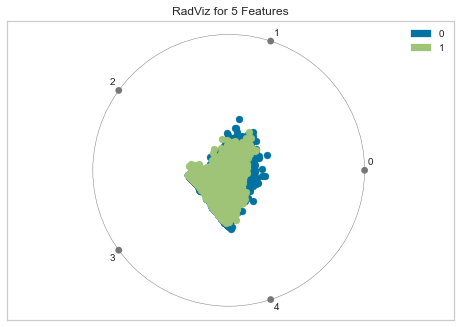

In [10]:
from yellowbrick.features import RadViz

full_X = scaler.transform(df.iloc[:,:-1])
full_y = df.iloc[:,-1]

# Instantiate the visualizer
visualizer = RadViz()

# Fit the data to the visualizer
full_X = pd.DataFrame(pca.transform(full_X))

visualizer.fit(full_X, full_y)           

# Transform the data
visualizer.transform(full_X)     

# Finalize and render the figure
visualizer.show()   